In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer 
import re
from datetime import date, datetime, timedelta
from nltk.probability import FreqDist

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
df=pd.read_csv('full_dataset.csv')
df.head(1)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,index,title,media,date,datetime,desc,link,img
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,Seattle police release video of fatal shooting...,The Seattle Times,01/01/2019,NaN,"Faletogo died of a gunshot wound to the head, ...",https://www.seattletimes.com/seattle-news/crim...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."


In [33]:
#Convert string values in date column to datetime values 
#df['date']=df['date'].apply(lambda x: datetime.strptime(str(x), '%m/%d/%Y'))
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [34]:
# Drop index and img columns and unneeded columns
df = df.drop(['index', 'img', 'datetime','Unnamed: 0','Unnamed: 0.1',
              'Unnamed: 0.1.1','Unnamed: 0.1.1.1','Unnamed: 0.1.1.1.1',
              'Unnamed: 0.1.1.1.1.1','Unnamed: 0.1.1.1.1.1.1','index'], axis=1)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57051 entries, 0 to 57050
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   title   57051 non-null  object        
 1   media   55081 non-null  object        
 2   date    56761 non-null  datetime64[ns]
 3   desc    57051 non-null  object        
 4   link    57051 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 2.2+ MB


In [36]:
#Fill in Missing values in 'media'
df['media']=df.media.fillna('Others')

In [37]:
#Number of unique news sources
len(df.media.unique())

570

In [38]:
#Top 10 news sources
top_10=df.media.value_counts().head(10)
top_10

The Seattle Times           11294
KIRO-TV                      6641
KING 5                       3002
MyNorthwest.com              2634
Others                       1970
KOMO News                    1706
The Spokesman-Review         1651
KOMO                         1550
KUOW                         1466
CHS Capitol Hill Seattle     1332
Name: media, dtype: int64

In [39]:
#Create Local vs national media dictionary 0-local, 1 = national "Others" =0
media_dict = {
    'The Seattle Times': 0, 
       'West Seattle Blog...':0, 'Others':0 , 'CHS Capitol Hill Seattle':0,
        'Westside Seattle':0, 'PubliCola':0, 'South Seattle Emerald':0,
       'KIRO-TV':0,  'KOMO':0,  'Seattle PI':0,
       'Real Change':0, 'KING 5':0,  'The Stranger':0,
       'Council Connection':0, 'Q13 FOX':0,
       'MyNorthwest.com':0,
       'KOMO News':0,
       'Seattle Met':0,   'Seattle Weekly':0,
    'Northwest Asian Weekly':0,  'West Seattle Blog…': 0,
    'Seattle Spectator': 0, 'Washington Times': 0,   
    'Seattle Magazine |':0, 'Seattle Met':0,
       'Seattle PI':0, 'Seattle Refined':0, 'Seattle Spectator':0,'South Seattle Emerald':0,
       'Seattle Times Interactives Projects':0, 'Seattle Weekly':0,'The Seattle Globalist':0, 'The Seattle Medium':0,
     'West Seattle Blog...':0, 'West Seattle Blog…':0, 'Westside Seattle':0, 'Real Change':0, 
    'International Examiner':0,'dailyuw.com':0


}

In [40]:
for x in df['media']:
    if x not in media_dict:
        media_dict[x]=1
    
df['Local']=[media_dict[x] for x in df['media']]

df.head()

,title,media,date,desc,link,Local
0,Seattle police release video of fatal shooting...,The Seattle Times,2019-01-01,"Faletogo died of a gunshot wound to the head, ...",https://www.seattletimes.com/seattle-news/crim...,0
1,Fatal Seattle police shooting will test new ac...,Crosscut,2019-01-01,Faletogo was stopped by police officers while ...,https://crosscut.com/2019/01/fatal-seattle-pol...,1
2,Seattle Police release body cam footage in fat...,MyNorthwest.com,2019-01-01,The Seattle Police Department released the bod...,https://mynorthwest.com/1232749/seattle-police...,0
3,Former Seattle police chief Jim Pugel will run...,The Seattle Times,2019-01-01,More than two dozen candidates are running acr...,https://www.seattletimes.com/seattle-news/poli...,0
4,Judge dismisses claims against 2 Seattle polic...,The Seattle Times,2019-01-01,"Lyles had a history of contacts with SPD, most...",https://www.seattletimes.com/seattle-news/crim...,0


In [41]:
text =df['link'][0].split('.')[1]
text

'seattletimes'

In [42]:
#Replace 'Others' in media with core website name taken from  link column
df[df['media']=='Others']=df[df['media']=='Others'].apply(lambda x : df['link'][0].split('.')[1]  )

In [43]:
np.sort(df.media.unique())

array(['(Burien) Blog', '10TV', '11Alive.com', '12News.com', '247Sports',
       '6ABC', '89.7 NPR News', '9News', 'ABA Journal', 'ABC 33/40',
       'ABC Chicago', 'ABC News', 'ABC10', 'ABC13', 'ABC4 Utah',
       'ABC7 San Francisco', 'ABS-CBN News', 'AP News', 'Action News Jax',
       'Action News Now', 'Akron Beacon Journal', 'Alaska Public Media',
       'AlterNet', 'American Civil Liberties Union',
       'American Security Today', 'Argus Leader', 'Arizona Daily Star',
       'Army.mil', 'Ars Technica', 'Atlas Obscura', 'Auburn Examiner',
       'Auburn Reporter', 'Austin American-Statesman', 'Axios', 'BBC',
       'Baltimore Sun', 'Bangor Daily News', 'Bay News 9',
       'Bellevue Reporter', 'Bellingham Herald', 'Bemidji Pioneer',
       'Billboard', 'Biometric Update', 'Blabbermouth.net',
       'Black Enterprise', 'Bloomberg Law', 'Bloomberg.com',
       'Boing Boing', 'Boise State Public Radio', 'Boston 25 News',
       'Boston Herald', 'Boston.com', 'Bothell-Kenmore Report

In [44]:
df[df['media']=='Others']

,title,media,date,desc,link,Local


In [45]:
#Checking for missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57051 entries, 0 to 57050
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   57051 non-null  object
 1   media   57051 non-null  object
 2   date    56770 non-null  object
 3   desc    57051 non-null  object
 4   link    57051 non-null  object
 5   Local   57051 non-null  object
dtypes: object(6)
memory usage: 2.6+ MB


In [46]:
#Dropping rows with missing date value
df=df.dropna(subset=['date'])

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56770 entries, 0 to 57050
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   56770 non-null  object
 1   media   56770 non-null  object
 2   date    56770 non-null  object
 3   desc    56770 non-null  object
 4   link    56770 non-null  object
 5   Local   56770 non-null  object
dtypes: object(6)
memory usage: 3.0+ MB


In [48]:
df=df[df['Local']==0]
df=df.drop_duplicates(subset=['title','desc','link','media'])
df.head()

,title,media,date,desc,link,Local
0,Seattle police release video of fatal shooting...,The Seattle Times,2019-01-01 00:00:00,"Faletogo died of a gunshot wound to the head, ...",https://www.seattletimes.com/seattle-news/crim...,0
2,Seattle Police release body cam footage in fat...,MyNorthwest.com,2019-01-01 00:00:00,The Seattle Police Department released the bod...,https://mynorthwest.com/1232749/seattle-police...,0
3,Former Seattle police chief Jim Pugel will run...,The Seattle Times,2019-01-01 00:00:00,More than two dozen candidates are running acr...,https://www.seattletimes.com/seattle-news/poli...,0
4,Judge dismisses claims against 2 Seattle polic...,The Seattle Times,2019-01-01 00:00:00,"Lyles had a history of contacts with SPD, most...",https://www.seattletimes.com/seattle-news/crim...,0
5,‘We have your DNA’: Seattle police create vide...,The Seattle Times,2019-01-01 00:00:00,We have your DNA. It is in your best interest ...,https://www.seattletimes.com/seattle-news/crim...,0


In [49]:
#Save clean, preprocessed dataframe to csv for LDA/Topic Model
df.to_csv('topic_mod_data.csv', index=False)

df.shape

(2891, 6)

In [50]:
media=df['media'][df['Local']==0].unique()
media

array(['The Seattle Times', 'MyNorthwest.com', 'KING 5', 'KIRO-TV',
       'Q13 FOX', 'Seattle Weekly', 'CHS Capitol Hill Seattle',
       'West Seattle Blog...', 'Seattle PI', 'Northwest Asian Weekly',
       'Real Change', 'KOMO', 'The Stranger', 'KOMO News',
       'Westside Seattle', 'West Seattle Blog…', 'International Examiner',
       'Seattle Spectator', 'Washington Times', 'South Seattle Emerald',
       'Seattle Times Interactives Projects', 'The Seattle Globalist',
       'dailyuw.com', 'Seattle Magazine |', 'Seattle Refined',
       'PubliCola', 'Seattle Met', 'The Seattle Medium'], dtype=object)

In [51]:
#All Media Sources
np.sort(df.media.unique())

array(['CHS Capitol Hill Seattle', 'International Examiner', 'KING 5',
       'KIRO-TV', 'KOMO', 'KOMO News', 'MyNorthwest.com',
       'Northwest Asian Weekly', 'PubliCola', 'Q13 FOX', 'Real Change',
       'Seattle Magazine |', 'Seattle Met', 'Seattle PI',
       'Seattle Refined', 'Seattle Spectator',
       'Seattle Times Interactives Projects', 'Seattle Weekly',
       'South Seattle Emerald', 'The Seattle Globalist',
       'The Seattle Medium', 'The Seattle Times', 'The Stranger',
       'Washington Times', 'West Seattle Blog...', 'West Seattle Blog…',
       'Westside Seattle', 'dailyuw.com'], dtype=object)

In [52]:
#All DAte
np.sort(df.date.unique())

array([Timestamp('2019-01-01 00:00:00'), Timestamp('2019-02-01 00:00:00'),
       Timestamp('2019-03-01 00:00:00'), Timestamp('2019-04-01 00:00:00'),
       Timestamp('2019-05-01 00:00:00'), Timestamp('2019-06-01 00:00:00'),
       Timestamp('2019-07-01 00:00:00'), Timestamp('2019-08-01 00:00:00'),
       Timestamp('2019-09-01 00:00:00'), Timestamp('2019-10-01 00:00:00'),
       Timestamp('2019-11-01 00:00:00'), Timestamp('2019-12-01 00:00:00'),
       Timestamp('2020-01-01 00:00:00'), Timestamp('2020-02-01 00:00:00'),
       Timestamp('2020-03-01 00:00:00'), Timestamp('2020-04-01 00:00:00'),
       Timestamp('2020-05-01 00:00:00'), Timestamp('2020-06-01 00:00:00'),
       Timestamp('2020-07-01 00:00:00'), Timestamp('2020-08-01 00:00:00'),
       Timestamp('2020-09-01 00:00:00'), Timestamp('2020-10-01 00:00:00'),
       Timestamp('2020-11-01 00:00:00'), Timestamp('2020-12-01 00:00:00'),
       Timestamp('2021-01-01 00:00:00'), Timestamp('2021-02-01 00:00:00'),
       Timestamp('2021-03

In [53]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

#Tokenize and Normalize (standardize) the text by removing all punctuation 
#from 'title' and 'desc' making all text lower case

df.title = df.title.apply(lambda x: nltk.RegexpTokenizer(r"\w+").tokenize(x.lower()))
df.desc = df.desc.apply(lambda x: nltk.RegexpTokenizer(r"\w+").tokenize(x.lower()))

In [84]:
#extend list of stopwords to include search terms
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['seattle','police','officer','officers', 'shooting', 'killed', 'spd', 'department', 'said', 'say','call',
               'city','according', 'man', 'woman', 'girl','boy','year', 'old', 'new', 'one', 'two']
#'dependable','professional','respectful','delivering','quality','enforces','prevents']
stopwords.extend(newStopWords)

In [85]:
#Remove Stop words from the text and lemmetize/text stemming
#ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

'''df.title = df.title.apply(lambda x: [ps.stem(word) for word in x if word not in stopwords])
df.desc = df.desc.apply(lambda x: [ps.stem(word) for word in x if word not in stopwords])'''

df.title = df.title.apply(lambda x: [lemmatizer.lemmatize(word) for word in x if word not in stopwords])
df.desc = df.desc.apply(lambda x: [lemmatizer.lemmatize(word) for word in x if word not in stopwords])

In [86]:
#create trigram from tokenized list
from nltk.util import ngrams
def ngramconvert(df,n=3):
    for item in df[['title', 'desc']].columns:
        df['newtri'+item]=df[item].apply(lambda token_list: list(ngrams(token_list, n)))
    return df

In [87]:
ngramconvert(df, n=3)

#Initialize FreqDist objects
fdist_title = FreqDist()
fdist_desc = FreqDist()

#Measure of the frequency of words in the 'title' column
for lists_ in df['title']:
    for words in lists_:
        fdist_title[words]+=1
        
title_word_freq = pd.Series(fdist_title, name='freq_title').sort_values(ascending=False)

#Measure of the frequency of words in the 'desc' column
for lists_ in df['desc']:
    for words in lists_:
        fdist_desc[words]+=1
        
desc_word_freq = pd.Series(fdist_desc, name='freq_desc').sort_values(ascending=False)


In [88]:
#Calculating the top 5 words 

word_freq_table = pd.DataFrame(desc_word_freq).join(title_word_freq)

#word_freq_table['freq_total']= word_freq_table['freq_desc']+word_freq_table['freq_title']
word_freq_table = word_freq_table.fillna(int(0))
print(date, word_freq_table.head(20).sort_values(by=['freq_desc','freq_title'], ascending=False), word_freq_table.head(20).sort_values(by=['freq_title','freq_desc'], ascending=False))

2021-07-01 00:00:00                freq_desc  freq_title
chief                170       110.0
county               157        95.0
council              150       125.0
arrested             141       139.0
people               133        49.0
investigation        132        45.0
report               125        55.0
crime                124        85.0
time                 123        27.0
last                 118        12.0
shot                 117       111.0
suspect              111       158.0
detective            109        20.0
precinct             106        49.0
office               100        16.0
king                  96        67.0
found                 93        92.0
around                91        14.0
reported              89        16.0
mayor                 88        78.0                freq_desc  freq_title
suspect              111       158.0
arrested             141       139.0
council              150       125.0
shot                 117       111.0
chief             

In [89]:
#Calculating the top 5 words 
for date in df.date.unique():
    word_freq_table = pd.DataFrame(desc_word_freq).join(title_word_freq)

    #word_freq_table['freq_total']= word_freq_table['freq_desc']+word_freq_table['freq_title']
    word_freq_table = word_freq_table.fillna(int(0))
    print(date, word_freq_table.head(10).sort_values(by=['freq_desc','freq_title'], ascending=False), word_freq_table.head(20).sort_values(by=['freq_title','freq_desc'], ascending=False))

2019-01-01 00:00:00                freq_desc  freq_title
chief                170       110.0
county               157        95.0
council              150       125.0
arrested             141       139.0
people               133        49.0
investigation        132        45.0
report               125        55.0
crime                124        85.0
time                 123        27.0
last                 118        12.0                freq_desc  freq_title
suspect              111       158.0
arrested             141       139.0
council              150       125.0
shot                 117       111.0
chief                170       110.0
county               157        95.0
found                 93        92.0
crime                124        85.0
mayor                 88        78.0
king                  96        67.0
report               125        55.0
people               133        49.0
precinct             106        49.0
investigation        132        45.0
time              

In [90]:
#Trigram for news headlines
trigram_list =[]

for trigrams_ in df['newtrititle']:
    trigram_list.append(trigrams_)
trigram_headlines =pd.DataFrame(trigram_list)

In [91]:
trigram_headlines =trigram_headlines.stack()

In [92]:
trigram_headlines =pd.DataFrame(trigram_headlines)
trigram_headlines.columns = ['trigram_headlines']
trigram_headlines=trigram_headlines.reset_index().drop(['level_0', 'level_1'], axis=1)
trigram_headlines= trigram_headlines[trigram_headlines['trigram_headlines']!='None']

In [93]:
trigram_headlines.value_counts().head(30)

trigram_headlines                   
(mayor, jenny, durkan)                  20
(west, crime, watch)                    14
(cal, anderson, park)                   14
(black, life, matter)                   12
(washington, state, nation)             11
(19, area, washington)                  10
(coronavirus, daily, news)              10
(daily, news, update)                   10
(know, today, covid)                    10
(area, washington, state)               10
(covid, 19, area)                       10
(today, covid, 19)                      10
(chief, carmen, best)                   10
(news, update, march)                    6
(king, county, sheriff)                  6
(pierce, county, sheriff)                6
(chinatown, international, district)     6
(catalytic, converter, theft)            6
(march, capitol, hill)                   5
(stay, home, order)                      5
(1, dead, 1)                             5
(facial, recognition, technology)        5
(state, attorney,

In [94]:
#Trigram for news article summaries
trigram_sumlist =[]

for trigrams_ in df['newtridesc']:
    trigram_sumlist.append(trigrams_)
trigram_summaries =pd.DataFrame(trigram_sumlist)

In [95]:
trigram_summaries =trigram_summaries.stack()

In [96]:
trigram_summaries =pd.DataFrame(trigram_summaries)
trigram_summaries.columns = ['trigram_news_summaries']
trigram_summaries=trigram_summaries.reset_index().drop(['level_0', 'level_1'], axis=1)
trigram_summaries= trigram_summaries[trigram_summaries['trigram_news_summaries']!='None']

In [97]:
trigram_summaries.value_counts().head(30)

trigram_news_summaries          
(mayor, jenny, durkan)              50
(chief, carmen, best)               35
(chief, adrian, diaz)               29
(county, sheriff, office)           23
(interim, chief, adrian)            20
(black, life, matter)               19
(king, county, sheriff)             17
(206, 233, 5000)                    15
(tip, line, 206)                    15
(line, 206, 233)                    15
(harborview, medical, center)       14
(photo, courtesy, layoff)           12
(courtesy, layoff, todd)            11
(layoff, todd, herman)              11
(cox, medium, group)                10
(7, 9, 2021)                        10
(herman, show, note)                10
(washington, state, patrol)         10
(9, 2021, interim)                  10
(note, 7, 9)                        10
(show, note, 7)                     10
(todd, herman, show)                10
(herman, todd, herman)               9
(violent, crime, tip)                9
(todd, herman, todd)           

An initial analysis of the trigram_summaries results (shown above) and the word frequency distribution table for the news sumarries indicates that there is a set a text that appears repeatedly for 2,254 times and it contains text. 

Upon further investigation, we were able to identify the source text on the Seattle Police Department's website:

"The Seattle Police Department (SPD) prevents crime, enforces laws, and supports quality public safety by delivering respectful, professional, and dependable police services. SPD operates within a framework that divides the city into five geographical areas called "precincts". These precincts define east, west, north, south, and southwest patrol areas, with a police station in each."

This means that 2,254 articles in the dataset are coming from SPD or from a https://www.seattle.gov/police site which have the above text at the bottom of those pages.)



In [98]:
#Save clean, preprocessed dataframe to csv
df.to_csv('news_clean_tokens.csv', index=False)

In [99]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [100]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [101]:

from wordcloud import WordCloud

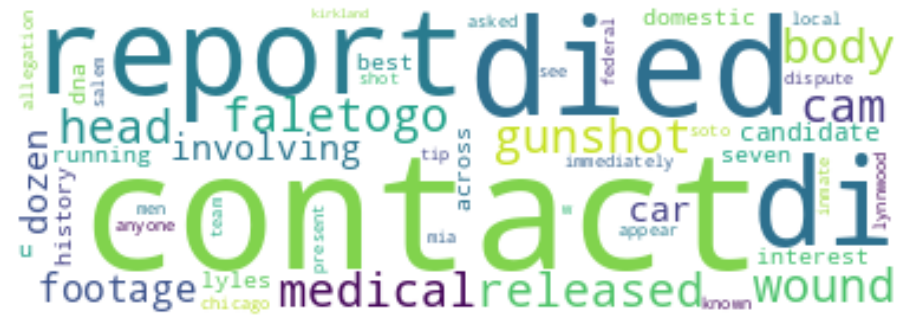

In [102]:
import numpy as np
from PIL import Image

# Create and generate a word cloud image:
spd_mask = np.array(Image.open('spd.png'))
wc = WordCloud(background_color='white',mask=spd_mask, max_words=50)

# for News summaries
wc.generate(str(df.desc))


# Display the generated image:
plt.figure(figsize = (16,9))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

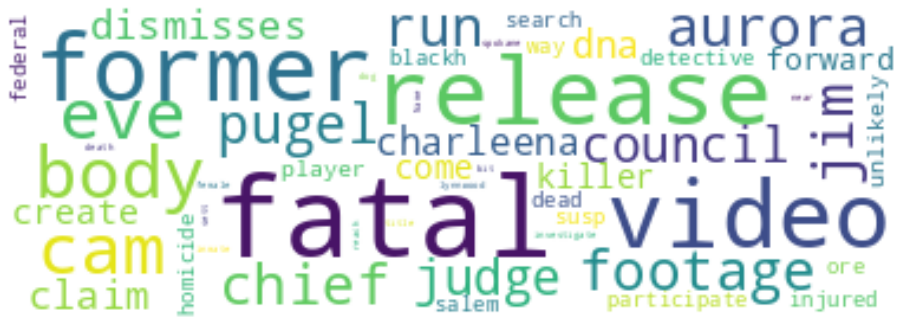

In [103]:
#For News Headlines
wc.generate(str(df.title))


# Display the generated image:
plt.figure(figsize = (16,9))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## Topic Modeling 

In [104]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [73]:
#for LDA
import pyLDAvis


# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/opt/conda/lib/python3.8/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [105]:
df_topic =df[['title', 'media', 'desc']]
df_topic.head()

,title,media,desc
0,"[release, video, fatal, eve]",The Seattle Times,"[faletogo, died, gunshot, wound, head, medical..."
2,"[release, body, cam, footage, fatal, aurora, a...",MyNorthwest.com,"[released, body, cam, footage, involving, car,..."
3,"[former, chief, jim, pugel, run, council]",The Seattle Times,"[dozen, candidate, running, across, seven, dis..."
4,"[judge, dismisses, claim, 2, fatal, charleena,...",The Seattle Times,"[lyles, history, contact, report, domestic, di..."
5,"[dna, create, video, get, killer, come, forward]",The Seattle Times,"[dna, best, interest, contact, u, immediately,..."


In [106]:
# Create Dictionary
headline_dictionary = corpora.Dictionary(df_topic.title)

# Create Corpus
headline_texts = df_topic['title']

# Term Document Frequency
corpus = [headline_dictionary.doc2bow(text) for text in headline_texts]


2021-08-06 16:43:32,965 INFO adding document #0 to Dictionary(0 unique tokens: [])
2021-08-06 16:43:33,174 INFO built Dictionary(4582 unique tokens: ['eve', 'fatal', 'release', 'video', 'aurora']...) from 2891 documents (total 20415 corpus positions)
2021-08-06 16:43:33,175 INFO Dictionary lifecycle event {'msg': "built Dictionary(4582 unique tokens: ['eve', 'fatal', 'release', 'video', 'aurora']...) from 2891 documents (total 20415 corpus positions)", 'datetime': '2021-08-06T16:43:33.175408', 'gensim': '4.0.1', 'python': '3.8.8 | packaged by conda-forge | (default, Feb 20 2021, 16:22:27) \n[GCC 9.3.0]', 'platform': 'Linux-5.4.109+-x86_64-with-glibc2.10', 'event': 'created'}


In [107]:
# Create Dictionary
summary_dictionary = corpora.Dictionary(df_topic.title)

# Create Corpus
summary_texts = df_topic['desc']

# Term Document Frequency
corpus_sum = [summary_dictionary.doc2bow(text) for text in summary_texts]


2021-08-06 16:43:33,365 INFO adding document #0 to Dictionary(0 unique tokens: [])
2021-08-06 16:43:33,568 INFO built Dictionary(4582 unique tokens: ['eve', 'fatal', 'release', 'video', 'aurora']...) from 2891 documents (total 20415 corpus positions)
2021-08-06 16:43:33,569 INFO Dictionary lifecycle event {'msg': "built Dictionary(4582 unique tokens: ['eve', 'fatal', 'release', 'video', 'aurora']...) from 2891 documents (total 20415 corpus positions)", 'datetime': '2021-08-06T16:43:33.569632', 'gensim': '4.0.1', 'python': '3.8.8 | packaged by conda-forge | (default, Feb 20 2021, 16:22:27) \n[GCC 9.3.0]', 'platform': 'Linux-5.4.109+-x86_64-with-glibc2.10', 'event': 'created'}


In [108]:
# number of topics
num_topics = 5

# Build LDA model for headlines
lda_model_headline = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=headline_dictionary,
                                       num_topics=num_topics,
                                       random_state =42)

2021-08-06 16:43:33,765 INFO using symmetric alpha at 0.2
2021-08-06 16:43:33,767 INFO using symmetric eta at 0.2
2021-08-06 16:43:33,769 INFO using serial LDA version on this node
2021-08-06 16:43:33,860 INFO running online LDA training, 5 topics, 1 passes over the supplied corpus of 2891 documents, updating every 30000 documents, evaluating every ~2891 documents, iterating 50x with a convergence threshold of 0.001000
2021-08-06 16:43:33,861 WARNING too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2021-08-06 16:43:33,862 INFO training LDA model using 15 processes
2021-08-06 16:43:34,860 INFO PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/2891, outstanding queue size 1
2021-08-06 16:43:34,870 INFO PROGRESS: pass 0, dispatched chunk #1 = documents up to #2891/2891, outstanding queue size 2
2021-08-06 16:43:44,956 INFO topic #0 (0.200): 0.009*"protest" + 0.007*"suspect" + 0.007*"capitol" + 0.006*"hill"

In [109]:
# number of topics
num_topics = 5

# Build LDA model for summaries
lda_model_summary = gensim.models.LdaMulticore(corpus=corpus_sum,
                                       id2word=summary_dictionary,
                                       num_topics=num_topics,
                                       random_state =42)

2021-08-06 16:43:46,860 INFO using symmetric alpha at 0.2
2021-08-06 16:43:46,862 INFO using symmetric eta at 0.2
2021-08-06 16:43:46,863 INFO using serial LDA version on this node
2021-08-06 16:43:46,867 INFO running online LDA training, 5 topics, 1 passes over the supplied corpus of 2891 documents, updating every 30000 documents, evaluating every ~2891 documents, iterating 50x with a convergence threshold of 0.001000
2021-08-06 16:43:46,868 WARNING too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2021-08-06 16:43:46,869 INFO training LDA model using 15 processes
2021-08-06 16:43:47,869 INFO PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/2891, outstanding queue size 1
2021-08-06 16:43:47,961 INFO PROGRESS: pass 0, dispatched chunk #1 = documents up to #2891/2891, outstanding queue size 2
2021-08-06 16:43:58,968 INFO topic #0 (0.200): 0.007*"last" + 0.006*"protest" + 0.006*"tacoma" + 0.005*"7" + 0.00

In [110]:
from pprint import pprint

In [111]:
pprint(lda_model_headline.print_topics())
doc_lda_headline = lda_model_headline[corpus]

2021-08-06 16:44:01,275 INFO topic #0 (0.200): 0.009*"protest" + 0.007*"suspect" + 0.007*"capitol" + 0.006*"hill" + 0.006*"mayor" + 0.005*"death" + 0.005*"accused" + 0.005*"arrested" + 0.005*"tacoma" + 0.005*"video"
2021-08-06 16:44:01,276 INFO topic #1 (0.200): 0.012*"council" + 0.005*"washington" + 0.005*"state" + 0.005*"crash" + 0.005*"shot" + 0.005*"west" + 0.005*"19" + 0.005*"update" + 0.004*"stolen" + 0.004*"arrested"
2021-08-06 16:44:01,277 INFO topic #2 (0.200): 0.011*"arrest" + 0.010*"suspect" + 0.008*"crime" + 0.007*"arrested" + 0.006*"shot" + 0.005*"fatally" + 0.005*"chief" + 0.005*"home" + 0.004*"car" + 0.004*"protest"
2021-08-06 16:44:01,278 INFO topic #3 (0.200): 0.009*"county" + 0.009*"suspect" + 0.008*"found" + 0.007*"king" + 0.006*"arrested" + 0.006*"dead" + 0.005*"council" + 0.005*"drug" + 0.005*"protest" + 0.004*"downtown"
2021-08-06 16:44:01,279 INFO topic #4 (0.200): 0.014*"chief" + 0.006*"3" + 0.006*"mayor" + 0.006*"murder" + 0.005*"arrested" + 0.005*"fire" + 0.00

[(0,
  '0.009*"protest" + 0.007*"suspect" + 0.007*"capitol" + 0.006*"hill" + '
  '0.006*"mayor" + 0.005*"death" + 0.005*"accused" + 0.005*"arrested" + '
  '0.005*"tacoma" + 0.005*"video"'),
 (1,
  '0.012*"council" + 0.005*"washington" + 0.005*"state" + 0.005*"crash" + '
  '0.005*"shot" + 0.005*"west" + 0.005*"19" + 0.005*"update" + 0.004*"stolen" '
  '+ 0.004*"arrested"'),
 (2,
  '0.011*"arrest" + 0.010*"suspect" + 0.008*"crime" + 0.007*"arrested" + '
  '0.006*"shot" + 0.005*"fatally" + 0.005*"chief" + 0.005*"home" + 0.004*"car" '
  '+ 0.004*"protest"'),
 (3,
  '0.009*"county" + 0.009*"suspect" + 0.008*"found" + 0.007*"king" + '
  '0.006*"arrested" + 0.006*"dead" + 0.005*"council" + 0.005*"drug" + '
  '0.005*"protest" + 0.004*"downtown"'),
 (4,
  '0.014*"chief" + 0.006*"3" + 0.006*"mayor" + 0.006*"murder" + '
  '0.005*"arrested" + 0.005*"fire" + 0.005*"protest" + 0.005*"tacoma" + '
  '0.005*"2" + 0.004*"cop"')]


In [112]:
pprint(lda_model_summary.print_topics())
doc_lda_summary = lda_model_summary[corpus_sum]

2021-08-06 16:44:01,365 INFO topic #0 (0.200): 0.007*"last" + 0.006*"protest" + 0.006*"tacoma" + 0.005*"7" + 0.005*"investigation" + 0.005*"reported" + 0.005*"street" + 0.005*"precinct" + 0.005*"may" + 0.005*"federal"
2021-08-06 16:44:01,367 INFO topic #1 (0.200): 0.012*"council" + 0.006*"investigation" + 0.006*"precinct" + 0.005*"day" + 0.005*"shot" + 0.005*"last" + 0.005*"county" + 0.004*"would" + 0.004*"community" + 0.004*"king"
2021-08-06 16:44:01,457 INFO topic #2 (0.200): 0.011*"time" + 0.010*"crime" + 0.006*"detective" + 0.006*"report" + 0.006*"arrested" + 0.005*"statement" + 0.005*"investigation" + 0.005*"county" + 0.005*"suspect" + 0.005*"around"
2021-08-06 16:44:01,458 INFO topic #3 (0.200): 0.009*"people" + 0.008*"county" + 0.007*"arrested" + 0.006*"found" + 0.006*"time" + 0.006*"morning" + 0.005*"friday" + 0.005*"report" + 0.005*"drug" + 0.005*"king"
2021-08-06 16:44:01,460 INFO topic #4 (0.200): 0.015*"chief" + 0.007*"best" + 0.006*"carmen" + 0.006*"investigating" + 0.005*

[(0,
  '0.007*"last" + 0.006*"protest" + 0.006*"tacoma" + 0.005*"7" + '
  '0.005*"investigation" + 0.005*"reported" + 0.005*"street" + '
  '0.005*"precinct" + 0.005*"may" + 0.005*"federal"'),
 (1,
  '0.012*"council" + 0.006*"investigation" + 0.006*"precinct" + 0.005*"day" + '
  '0.005*"shot" + 0.005*"last" + 0.005*"county" + 0.004*"would" + '
  '0.004*"community" + 0.004*"king"'),
 (2,
  '0.011*"time" + 0.010*"crime" + 0.006*"detective" + 0.006*"report" + '
  '0.006*"arrested" + 0.005*"statement" + 0.005*"investigation" + '
  '0.005*"county" + 0.005*"suspect" + 0.005*"around"'),
 (3,
  '0.009*"people" + 0.008*"county" + 0.007*"arrested" + 0.006*"found" + '
  '0.006*"time" + 0.006*"morning" + 0.005*"friday" + 0.005*"report" + '
  '0.005*"drug" + 0.005*"king"'),
 (4,
  '0.015*"chief" + 0.007*"best" + 0.006*"carmen" + 0.006*"investigating" + '
  '0.005*"mayor" + 0.005*"budget" + 0.005*"detective" + 0.005*"shot" + '
  '0.005*"fire" + 0.004*"durkan"')]


In [113]:
from gensim.models import Word2Vec

In [114]:
cluster_model = Word2Vec(df['desc'], min_count=1)

2021-08-06 16:44:01,573 INFO collecting all words and their counts
2021-08-06 16:44:01,657 INFO PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-08-06 16:44:01,672 INFO collected 6787 word types from a corpus of 33319 raw words and 2891 sentences
2021-08-06 16:44:01,673 INFO Creating a fresh vocabulary
2021-08-06 16:44:01,863 INFO Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 6787 unique words (100.0%% of original 6787, drops 0)', 'datetime': '2021-08-06T16:44:01.863365', 'gensim': '4.0.1', 'python': '3.8.8 | packaged by conda-forge | (default, Feb 20 2021, 16:22:27) \n[GCC 9.3.0]', 'platform': 'Linux-5.4.109+-x86_64-with-glibc2.10', 'event': 'prepare_vocab'}
2021-08-06 16:44:01,864 INFO Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 33319 word corpus (100.0%% of original 33319, drops 0)', 'datetime': '2021-08-06T16:44:01.864614', 'gensim': '4.0.1', 'python': '3.8.8 | packaged by conda-forge | (default, Feb 20 2021, 16:22:27) \n[G

In [115]:
cluster_model.wv.most_similar('asian', topn=10)

[('kent', 0.7354872822761536),
 ('office', 0.7308675050735474),
 ('arrested', 0.7294604778289795),
 ('arrest', 0.7267356514930725),
 ('council', 0.7266687154769897),
 ('people', 0.7258192896842957),
 ('made', 0.725274384021759),
 ('precinct', 0.7249982357025146),
 ('20', 0.7245696187019348),
 ('area', 0.7240836024284363)]

In [116]:
cluster_model.wv.most_similar('white', topn=10)  # - The word 'immigrant' is not present in the text

[('district', 0.6698448061943054),
 ('county', 0.655821681022644),
 ('tacoma', 0.6519445776939392),
 ('pm', 0.6512935757637024),
 ('place', 0.6511284708976746),
 ('make', 0.6505955457687378),
 ('working', 0.6502591967582703),
 ('los', 0.6489092111587524),
 ('fire', 0.6486504673957825),
 ('defund', 0.647199273109436)]

In [117]:
cluster_model.wv.most_similar('african', topn=10)

[('deadly', 0.4297950565814972),
 ('jenny', 0.42483165860176086),
 ('lewis', 0.4125863015651703),
 ('gas', 0.4084171950817108),
 ('late', 0.3966769278049469),
 ('floyd', 0.38100993633270264),
 ('sent', 0.37738415598869324),
 ('nonviolent', 0.37133312225341797),
 ('fentanyl', 0.3700389564037323),
 ('announced', 0.3699052929878235)]

In [120]:
cluster_model.wv.most_similar('black', topn=10)

[('last', 0.9725487232208252),
 ('tuesday', 0.971538782119751),
 ('suspect', 0.970766007900238),
 ('crime', 0.97002774477005),
 ('report', 0.9697843790054321),
 ('tacoma', 0.9693730473518372),
 ('night', 0.969072163105011),
 ('around', 0.9687652587890625),
 ('shot', 0.9683867692947388),
 ('time', 0.9678659439086914)]

## Vectorizing the data

In [206]:
#vectorize model
vectors_wv = cluster_model.wv.vectors
indicies_wv = {word:cluster_model.wv.get_vector(word, norm=True) for word in cluster_model.wv.key_to_index}

In [207]:
def vectorize(line): 
    words = []
    for word in line: # line - iterable, for example list of tokens 
        try:
            w2v_idx = indicies_wv[word]
        except KeyError: # if you do not have a vector for this word in your model, continue 
            continue
        words.append(vectors_wv[w2v_idx])
        if words: 
            words = np.asarray(words)
            min_vec = words.min(axis=0)
            max_vec = words.max(axis=0)
            return np.concatenate((min_vec, max_vec))
        if not words:
            return None 

In [208]:
#X = [vectorize(line_) for line_ in df['desc']]
    

## KMeans clustering using scikit-learn

In [214]:
from sklearn import cluster, metrics

NUM_CLUSTERS=5

kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(vectors_wv)
 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [210]:
def get_key(val):
    for key_ in indicies_wv.keys():
        if val in indicies_wv[key_]:
            return print(key_)
    return print('not here')

get_key(-8.0469064e-04)

not here


## KMeans clustering using nltk

In [211]:
from nltk.cluster import KMeansClusterer, euclidean_distance
NUM_CLUSTERS=5
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=euclidean_distance, repeats=25)
assigned_clusters = kclusterer.cluster(vectors_wv, assign_clusters=True)


In [212]:
set(assigned_clusters) #test to confirm clustering

{0, 1, 2, 3, 4}

In [122]:

from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from sklearn.cluster import MiniBatchKMeans

import logging
from optparse import OptionParser
import sys
from time import time



# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')

# parse commandline arguments
op = OptionParser()
op.add_option("--lsa",
              dest="n_components", type="int",
              help="Preprocess documents with latent semantic analysis.")
op.add_option("--no-minibatch",
              action="store_false", dest="minibatch", default=True,
              help="Use ordinary k-means algorithm (in batch mode).")
op.add_option("--no-idf",
              action="store_false", dest="use_idf", default=True,
              help="Disable Inverse Document Frequency feature weighting.")
op.add_option("--use-hashing",
              action="store_true", default=False,
              help="Use a hashing feature vectorizer")
op.add_option("--n-features", type=int, default=10000,
              help="Maximum number of features (dimensions)"
                   " to extract from text.")
op.add_option("--verbose",
              action="store_true", dest="verbose", default=False,
              help="Print progress reports inside k-means algorithm.")

print(__doc__)
op.print_help()


def is_interactive():
    return not hasattr(sys.modules['__main__'], '__file__')


# work-around for Jupyter notebook and IPython console
argv = [] if is_interactive() else sys.argv[1:]
(opts, args) = op.parse_args(argv)
if len(args) > 0:
    op.error("this script takes no arguments.")
    sys.exit(1)


# #############################################################################
# Load some categories from the training set

# Uncomment the following to do the analysis on all the categories
# categories = None



dataset = pd.read_csv('topic_mod_data.csv') #Clone of the cleaned original dataset, prior to preprocessing the text

stopwords = text.ENGLISH_STOP_WORDS.union(newStopWords)

print("%d documents" % len(dataset.desc))

print()

labels = dataset.desc
true_k = np.unique(labels).shape[0]

print("Extracting features from the training dataset "
      "using a sparse vectorizer")
t0 = time()
if opts.use_hashing:
    if opts.use_idf:
        # Perform an IDF normalization on the output of HashingVectorizer
        hasher = HashingVectorizer(n_features=opts.n_features,
                                   stop_words=stopwords, alternate_sign=False,
                                   norm=None)
        vectorizer = make_pipeline(hasher, TfidfTransformer())
    else:
        vectorizer = HashingVectorizer(n_features=opts.n_features,
                                       stop_words=stopwords,
                                       alternate_sign=False, norm='l2')
else:
    vectorizer = TfidfVectorizer(max_df=0.5, max_features=opts.n_features,
                                 min_df=2, stop_words=stopwords,
                                 use_idf=opts.use_idf)
X = vectorizer.fit_transform(dataset.desc)

print("done in %fs" % (time() - t0))
print("n_samples: %d, n_features: %d" % X.shape)
print()

if opts.n_components:
    print("Performing dimensionality reduction using LSA")
    t0 = time()
    # Vectorizer results are normalized, which makes KMeans behave as
    # spherical k-means for better results. Since LSA/SVD results are
    # not normalized, we have to redo the normalization.
    svd = TruncatedSVD(opts.n_components)
    normalizer = Normalizer(copy=False)
    lsa = make_pipeline(svd, normalizer)

    X = lsa.fit_transform(X)

    print("done in %fs" % (time() - t0))

    explained_variance = svd.explained_variance_ratio_.sum()
    print("Explained variance of the SVD step: {}%".format(
        int(explained_variance * 100)))

    print()


# #############################################################################
# Do the actual clustering

if opts.minibatch:
    km = MiniBatchKMeans(n_clusters=6, init='k-means++',
                          verbose=opts.verbose, random_state=42)
else:
    km = KMeans(n_clusters=5, init='k-means++', max_iter=200, 
                verbose=opts.verbose, random_state=42)

print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(X)
print("done in %0.3fs" % (time() - t0))
print()

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, km.labels_))

print()


if not opts.use_hashing:
    print("Top terms per cluster:")

    if opts.n_components:
        original_space_centroids = svd.inverse_transform(km.cluster_centers_)
        order_centroids = original_space_centroids.argsort()[:, ::-1]
    else:
        order_centroids = km.cluster_centers_.argsort()[:, ::-1]

    terms = vectorizer.get_feature_names()
    for i in range(true_k):
        print("Cluster %d:" % i, end='')
        for ind in order_centroids[i, :10]:
            print(' %s' % terms[ind], end='')
        print()

df.title = df.title.apply(lambda x: [ps.stem(word) for word in x if word not in stopwords])
df.desc = df.desc.apply(lambda x: [ps.stem(word) for word in x if word not in stopwords])
Usage: ipykernel_launcher.py [options]

Options:
  -h, --help            show this help message and exit
  --lsa=N_COMPONENTS    Preprocess documents with latent semantic analysis.
  --no-minibatch        Use ordinary k-means algorithm (in batch mode).
  --no-idf              Disable Inverse Document Frequency feature weighting.
  --use-hashing         Use a hashing feature vectorizer
  --n-features=N_FEATURES
                        Maximum number of features (dimensions) to extract
                        from text.
  --verbose             Print progress reports inside k-means algorithm.
2891 documents

Extracting features from the training dataset using a sparse vectorizer
done in 0.301981s
n_samples: 2891, n_features: 3403

Clustering sparse data with MiniBatchKMeans(n_clusters=6, random_state=42, verbo

IndexError: index 6 is out of bounds for axis 0 with size 6